In [74]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values


array(['CONTROL', '# CHEQUE', 'PARTIDA PRESUPUESTAL', 'UIDD/FOLIO FISCAL',
       'DIRECCION', 'REGIMEN FISCAL', 'NOMBRE REGIMEN FISCAL', 'RFC',
       'STATUS', 'FECHA DE RECIBIDO', 'SEMANA QUE SE PAGA', 'TIPO',
       'NOMBRE DEL PROVEEDOR', 'CORREO', 'CONCEPTO', 'TIPO2', 'SUBTOTAL',
       'IVA', 'OTROS IMPUESTOS', 'RET IVA', 'RET ISR', 'TOTAL',
       'CUENTA CLAVE', 'BANCO', 'ESTATUS', 'FECHA DE PAGO ', 'NOTAS',
       'Valida', 'MES', 'Column1', 'SUBTOTAL2', 'IVA3', 'RET IVA4',
       'RET ISR.1', 'TOTAL.1', 'CAMBIOS', 'Unnamed: 36'], dtype=object)

In [119]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_numeros = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO ","SUBTOTAL","PARTIDA PRESUPUESTAL"], how='all')


# Asegurar que los datos numéricos estén en el formato correcto
df_numeros = df_numeros[pd.to_numeric(df_numeros['FECHA DE PAGO '], errors='coerce').notna()]
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]
cuentas=df_numeros["PARTIDA PRESUPUESTAL"].unique()
cuentas.sort()
cuentas=cuentas[:-9]
df_numeros=df_numeros[df_numeros['PARTIDA PRESUPUESTAL'].isin(cuentas)]
#df_numeros=df_numeros.loc[df_numeros["Valida"] != "Balance", :]
df_numeros["FECHA DE PAGO "]=df_numeros["FECHA DE PAGO "]-df_numeros["FECHA DE PAGO "].min()
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] >= 0, :]
df_numeros = df_numeros.dropna(subset=['TOTAL'])
df_numeros = df_numeros.dropna(subset=['SUBTOTAL'])
df_numeros = df_numeros.dropna(subset=['PARTIDA PRESUPUESTAL'])


display(df_numeros)
#np.sum(df_numeros["SUBTOTAL"])
cuentas

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.000000,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.000000
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.000000,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.000000
5,N004,0005,1122-005,2.0,6100,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,3.0,NaN,37.000000,...,1122-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45131.000000
6,N005,0006,1101-007,3.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,44.000000,...,1101-007,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.000000
7,N006,0007,1107-005,4.0,6140,Personas Físicas con Actividades Empresariales...,Personas Físicas con Actividades Empresariales...,4.0,NaN,44.000000,...,1107-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6756,P676,2469,6004-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6004-004,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6757,P677,2470,6002-004,4607.0,11550,612,Personas Físicas con Actividades Empresariales...,1083.0,VIGENTE,464.740405,...,6002-004,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44703.259595
6758,P678,2471,6136-009,4608.0,44150,601,General de Ley Personas Morales,121.0,VIGENTE,467.694468,...,6136-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44700.305532
6759,N1304,2472,1202-006,4609.0,16030,626,Régimen Simplificado de Confianza,10.0,VIGENTE,463.523438,...,1202-006,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44704.476562


array(['1101-005', '1101-006', '1101-007', ..., '7230-002', '7230-003',
       '7230-005'], dtype=object)

In [78]:
# Resumen general
print(df_numeros.describe())
df_numeros = df_numeros.dropna(subset=['Valida'])

# Departamentos únicos
len(df_numeros["Valida"].unique())

#len(df_limpio["Valida"].unique())

       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        6194.000000  5702.000000         962.000000   
mean         2105.538747   281.985619         248.314484   
std          1303.047039   282.979346          72.727073   
min             0.000000     0.000000        -190.000000   
25%           784.000000    41.000000         204.500246   
50%          2054.000000   174.500000         271.568981   
75%          3247.750000   454.000000         285.478987   
max          4610.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           6262.000000  5984.000000  6266.000000  6.266000e+03   
mean             486.738422    37.471257  2056.868497  2.035583e+04   
std              402.321002    60.512985  1236.493695  8.692752e+04   
min                1.000000     0.000000     3.000000 -3.281300e+04   
25%              153.000000     1.000000   995.250000  5.155200e+02   
50%              343.000000    17

1033

In [100]:
# Crear la nueva columna tomando solo la parte antes del guion
df_numeros['Cuentasb'] = df_numeros['PARTIDA PRESUPUESTAL'].str.split('-').str[0]
df_numeros['Cuentasd2'] = df_numeros['PARTIDA PRESUPUESTAL'].str[:2]+"00"
print(len(df_numeros["Cuentasd2"].unique()))
print(df_numeros["PARTIDA PRESUPUESTAL"].isna().sum())
print(df_numeros['Cuentasd2'])

34
0
55      7000
52      1100
199     3600
286     3600
202     3400
        ... 
3860    2500
3861    2500
3862    2500
3454    2400
3452    2400
Name: Cuentasd2, Length: 6266, dtype: object


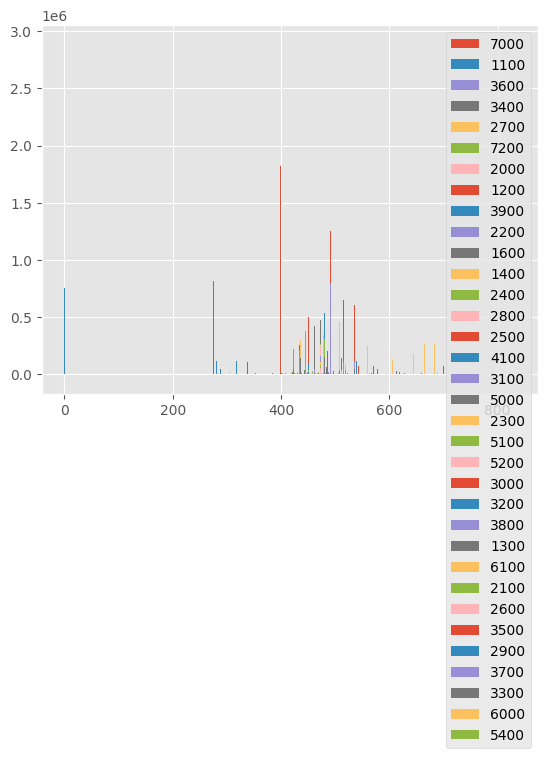

In [101]:
departamentos = list(df_numeros["Cuentasd2"].unique())
#departamentos.remove("Ba00")



for i in departamentos:
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'SUBTOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    plt.bar(semanas,coso,label=i)
    #print(coso)
plt.legend()

plt.show()

In [102]:
sumas=[]
for i in departamentos:
    e = sum(list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'SUBTOTAL']))
    sumas.append(e)
pie=pd.DataFrame({'sumas':sumas,'departamentos':departamentos})
pie.sort_values(by="sumas")

,sumas,departamentos
33,3.500000e+04,5400
28,2.990000e+05,3500
29,3.631832e+05,2900
31,4.082000e+05,3300
23,6.569780e+05,3800
10,8.780440e+05,1600
30,8.964000e+05,3700
18,9.510854e+05,2300
14,1.092001e+06,2500
13,1.159256e+06,2800


In [103]:
fig, ax = plt.subplots()
ax.pie(pie['sumas'], labels=pie['departamentos'])

([<matplotlib.patches.Wedge at 0x279b8451a30>,
 [Text(1.0802713891464448, 0.2073975067150294, '7000'),
  Text(0.8935341542155346, 0.641558037320342, '1100'),
  Text(0.5507941293191525, 0.9521690118395771, '3600'),
  Text(0.035190067062364445, 1.0994369737188878, '3400'),
  Text(-0.3802649144404592, 1.0321814737949864, '2700'),
  Text(-0.4909865371139705, 0.9843435479408762, '7200'),
  Text(-0.6867408170727136, 0.8592945072361989, '2000'),
  Text(-0.9699105552488059, 0.5189157107054607, '1200'),
  Text(-1.0916734432108204, 0.13508920529869042, '3900'),
  Text(-1.0980112219749094, -0.06611623414235164, '2200'),
  Text(-1.0910771689151153, -0.13982350114403902, '1600'),
  Text(-0.9699576553421397, -0.5188276658421166, '1400'),
  Text(-0.6286542979063636, -0.9026592788665373, '2400'),
  Text(-0.4790465138588024, -0.9902092897765242, '2800'),
  Text(-0.4234320019893971, -1.0152365929630647, '2500'),
  Text(-0.3588964134472849, -1.0398044837442642, '4100'),
  Text(-0.011943691206954633, -1.0

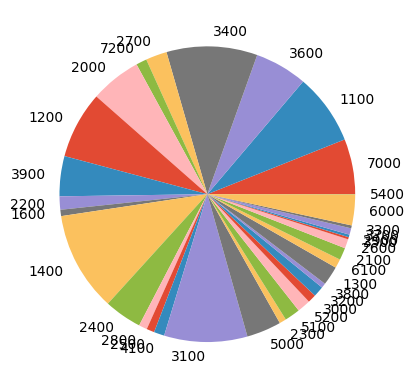

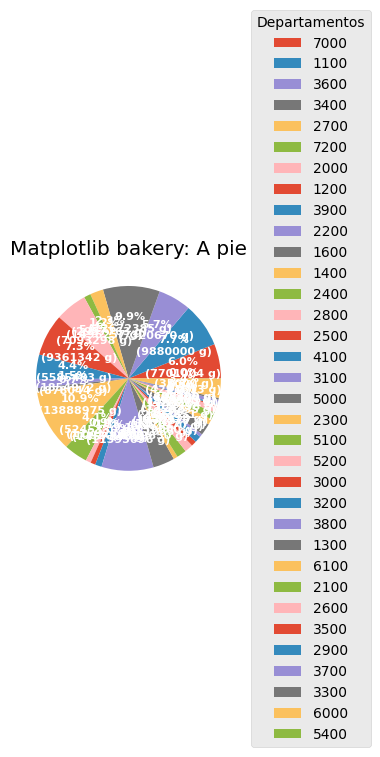

In [104]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))




def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(pie["sumas"], autopct=lambda pct: func(pct, pie["sumas"]),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie["departamentos"],
          title="Departamentos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [105]:
# Agrupar por departamentos y subdepartamentos
agrupado = df_numeros.groupby(["Cuentasb", "Subdepartamento"])["TOTAL"].sum().reset_index()

# Obtener lista de departamentos
departamentos = agrupado["Cuentasd2"].unique()

# Crear gráficos de pastel para cada departamento
fig, axes = plt.subplots(nrows=len(departamentos), figsize=(6, len(departamentos) * 3))

for idx, departamento in enumerate(departamentos):
    subdatos = agrupado[agrupado["Cuentasd2"] == departamento]

    ax = axes[idx] if len(departamentos) > 1 else axes
    wedges, texts, autotexts = ax.pie(subdatos["TOTAL"], 
                                      labels=subdatos["Subdepartamento"], 
                                      autopct=lambda pct: f"{pct:.1f}%\n({int(np.round(pct/100.*np.sum(subdatos['TOTAL'])))} g)",
                                      textprops=dict(color="w"))

    ax.set_title(f"Departamento: {departamento}")
    plt.setp(autotexts, size=8, weight="bold")

plt.tight_layout()
plt.show()

KeyError: 'Subdepartamento'

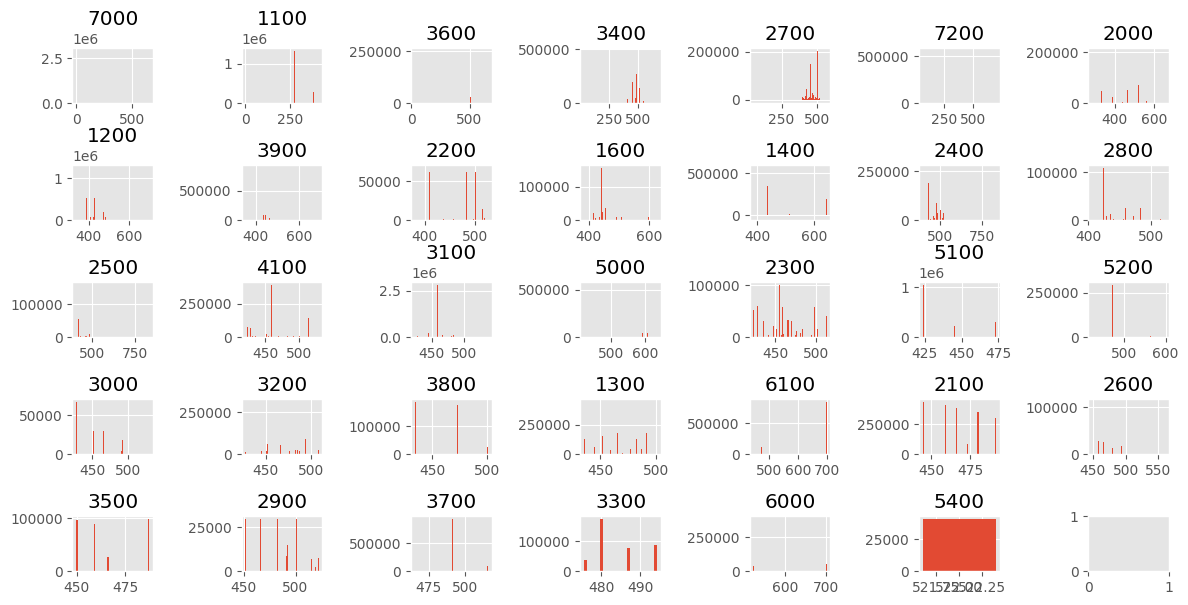

In [106]:
fig, axes = plt.subplots(5, 7, figsize=(12, 6))  # Crear figura con subgráficos


for ax, i in zip(axes.flat, departamentos):
    #otra.loc[otra["UNIDAD ESP."] == i, 'GASTO']
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    ax.bar(semanas,coso,label=i)
    ax.set_title(i)  # Opcional: título con el nombre del departamento

plt.tight_layout()  # Ajusta los gráficos para evitar superposición
plt.show()

In [107]:
df_numeros.sort_values('FECHA DE PAGO ', ascending=True, inplace=True)

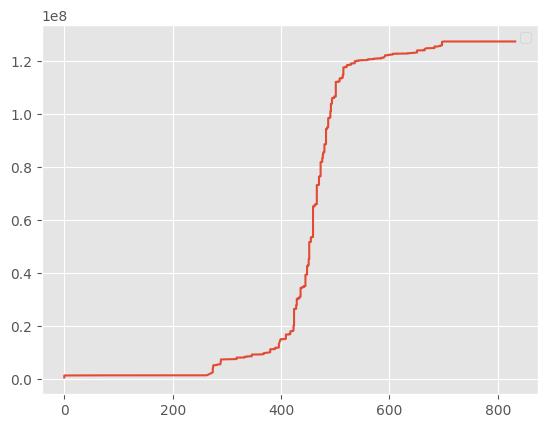

In [108]:
import numpy as np
acumulado=np.cumsum(df_numeros["SUBTOTAL"])
semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
plt.plot(df_numeros["FECHA DE PAGO "],acumulado)
    #print(coso)
plt.legend()

plt.show()

In [ ]:
df_budget = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Budget")
df_budget.columns=["A","B","C","D","PARTIDA PRESUPUESTAL","F","G","H","I","J","K"]
#df_budget.rename(columns={'Valida': 'Unnamed: 5'}, inplace=True)
print(len(df_budget["PARTIDA PRESUPUESTAL"]))
df_unida = df_numeros.merge(df_budget, on='PARTIDA PRESUPUESTAL')
df_unida = df_unida.dropna(subset=['C'])
#df_budget.columns.values
etapas=df_unida["A"].unique()
#etapas.remove("TIPO")
minimos=list(df_unida.groupby("A")["FECHA DE PAGO "].min())
maximos=list(df_unida.groupby("A")["FECHA DE PAGO "].max())
colormap = plt.cm.plasma  # Cambia 'viridis' por otro colormap como 'plasma', 'cividis', etc.
ocolormap = plt.cm.viridis
num_colores = len(minimos)  # Número de colores que deseas
colores = [colormap(i) for i in np.linspace(0, 1, num_colores)]
ocolores = [ocolormap(i) for i in np.linspace(0, 1, num_colores)]
print(df_unida.groupby("A")["FECHA DE PAGO "].min())
print(df_unida.groupby("A")["FECHA DE PAGO "].max())

#df_unida["C"].unique()
#etapas

A
Above the Line      0
Below the Line     28
Others              0
Post              424
Name: FECHA DE PAGO , dtype: int64
A
Above the Line    700
Below the Line    832
Others            660
Post              701
Name: FECHA DE PAGO , dtype: int64


In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit as logistic
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)
df_numeros["FECHA DE PAGO "] = pd.to_numeric(df_numeros["FECHA DE PAGO "], errors='coerce')
df_numeros = df_numeros.dropna(subset=["FECHA DE PAGO "])
x = df_numeros["FECHA DE PAGO "].values
x_scaled = (x - x.mean()) / x.std()

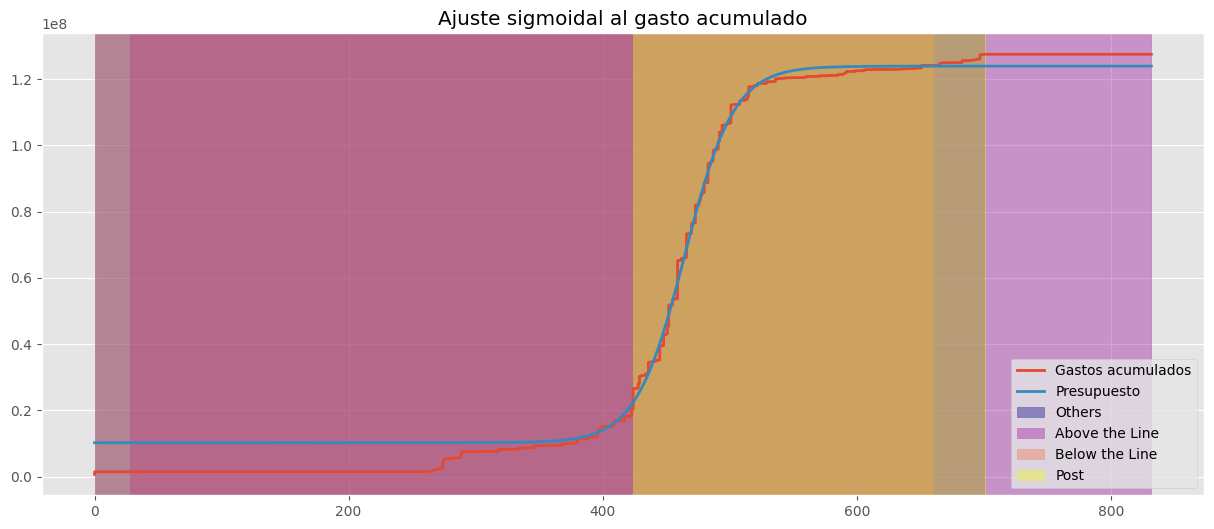

In [111]:
L_init = acumulado.max()
x0_init = 0  # porque lo escalaste
k_init = 1
b_init = acumulado.min()
p0 = [L_init, x0_init, k_init, b_init]
popt, pcov = curve_fit(sigmoid, x_scaled, acumulado, p0, method='dogbox')
y_pred = sigmoid(x_scaled, *popt)
#y_truth = logistic(df_numeros["FECHA DE PAGO "], L=L_estimate, x_0=0, k=1)


fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
for i in range(len(minimos)):
    ax.axvspan(minimos[i], maximos[i],color=colores[i],label=etapas[i],alpha=.4,edgecolor=ocolores[i])
ax.legend()
plt.show()

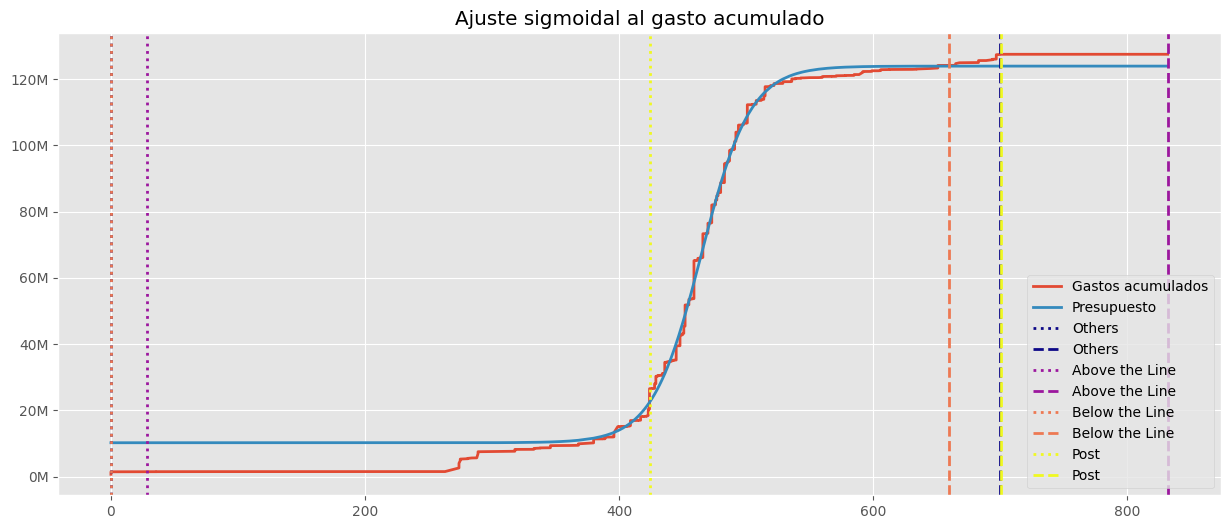

In [112]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(15, 6))
def formato_millones(x, pos):
    return f'{int(x/1000000)}M'
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
ax.yaxis.set_major_formatter(FuncFormatter(formato_millones))
for i in range(len(minimos)):
    ax.axvline(x=minimos[i], color=colores[i], linestyle=":",label=etapas[i],linewidth=2)
    ax.axvline(x=maximos[i], color=colores[i], linestyle="--",label=etapas[i],linewidth=2)
ax.legend()

plt.show()

In [113]:
acumulado.max()

127549599.60400023